# SUMMARY ANALYSIS

1. The duplicated mice were skewing the data revolving around the Timepoints and Tumor Volume due to the unreliability of not knowing the exact timing of treatment for that mouse.Therefore ridding of the the duplicates gives a fresh dataset to work with.



2. It also seems that of average all the regimens were giving in the same amounts besides Capomulin and Ramicane. This could be why Capomulin and Ramicane may have had a larger effect on the Tumor Volumne for their subjects.



3. Naftisol and Stesalyn have virtually the same effect as the Placebo which means they had no effect.


Limitation
1. There's ambiguity revolving around the solution of weather or the regimen cured the tumors or just kept them stabilized. Not really sure if there was any significant mitigation on the Tumor Volume.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

mouse_data = pd.read_csv("Data/Mouse_metadata.csv")
study_data = pd.read_csv("Data/Study_results.csv")


comb_data_df = pd.merge(mouse_data, study_data, on="Mouse ID", how="outer")

In [2]:
comb_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
#Calculate total Mice
total_mouse = mouse_data['Mouse ID'].count()
total_mouse

249

In [4]:
#get duplicates of mouse id and timepoint
dupl_df = comb_data_df.loc[comb_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dupl_df


array(['g989'], dtype=object)

In [5]:
#show duplicates
dupl_df = comb_data_df.loc[comb_data_df['Mouse ID'] == 'g989', :] 
dupl_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
#create clean df with a dropped mouse id
clean_df = comb_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)


clean_df.iloc[900:930]



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
900,g570,Propriva,Male,16,29,30,60.328717,1
901,g570,Propriva,Male,16,29,35,62.330420,2
902,g570,Propriva,Male,16,29,40,68.525856,2
903,g570,Propriva,Male,16,29,45,70.492788,2
904,g867,Stelasyn,Female,9,25,0,45.000000,0
905,g867,Stelasyn,Female,9,25,5,46.880749,0
906,g867,Stelasyn,Female,9,25,10,48.183402,0
907,g867,Stelasyn,Female,9,25,15,51.060419,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1


In [7]:
#dataframe with reduced mouse value 'g989'
clean_df = comb_data_df.loc[comb_data_df['Mouse ID']!= 'g989']

clean_df.head(910)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
905,g867,Stelasyn,Female,9,25,5,46.880749,0
906,g867,Stelasyn,Female,9,25,10,48.183402,0
907,g867,Stelasyn,Female,9,25,15,51.060419,1
921,h246,Ketapril,Male,13,30,0,45.000000,0


In [8]:
#calculate new total of mice
# new_total_mice = clean_df.value_counts()


# len(new_total_mice)



In [9]:
clean_df['Mouse ID'] == 'g989'


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1880, dtype: bool

In [10]:
clean_df['Mouse ID'].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

# SUMMARY STATISTICS

In [11]:
#Create and store variables to find mean, median, std.dev, sem for Drug Regimen and Tumor Volume

sum_mice_mean= comb_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
sum_mice_median= comb_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
sum_mice_variance= comb_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
sum_mice_stdev= comb_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sum_mice_sem= comb_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]



In [12]:
#create summary of mice dict
sum_mice_dict = {
                "Mean": sum_mice_mean,
                "Median": sum_mice_median,
                "Variance": sum_mice_variance,
                "Standard-Deviation":sum_mice_stdev,
                "SEM":sum_mice_sem
}

In [13]:
#create summary dataframe
sum_mice_df = pd.DataFrame(sum_mice_dict)

sum_mice_df

,Mean,Median,Variance,Standard-Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
#Create agg df
clean_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean', 'median','var','std','sem']})



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# BAR GRAPH AND PIE CHART

Text(0.5, 1.0, 'Mice Drug Regimen')

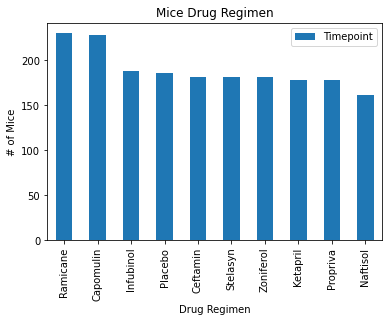

In [15]:
#create pandas bar chart
mouse_time= comb_data_df["Drug Regimen"].value_counts()
mouse_drug= comb_data_df["Drug Regimen"].unique()

mouse_tim_drug_df = pd.DataFrame({
                    'Timepoint': mouse_time,
                    'Drug Regimen':mouse_drug})
mouse_tim_drug_df.plot.bar('Drug Regimen', 'Timepoint')
plt.ylabel("# of Mice")
plt.title("Mice Drug Regimen")

In [16]:
# mouse_tim_drug_df.plot.bar?

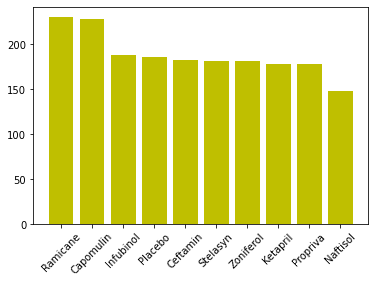

In [17]:
#create plt bar
x_axis = clean_df['Drug Regimen'].unique()
y_axis = clean_df['Drug Regimen'].value_counts()
sum_time_drug_mice = plt.bar(x_axis, y_axis, color='y',align='center')
ticks = x_axis
plt.xticks(ticks, rotation=45)
plt.show()


In [18]:

# total_mouse = clean_df['Mouse ID'].count()
# total_mouse

In [19]:
#create pandas pie chart for distribution for female and male mice
#fem_py = clean_df.loc[clean_df['Sex']=='Female'].count()
# fem_py_perc = fem_py / total_mouse *100
# male_py_perc = (total_mouse - fem_py) / total_mouse *100

#fem_py
#mouse_gender_py.plot.pie(y='Sex')

<AxesSubplot:ylabel='Gender'>

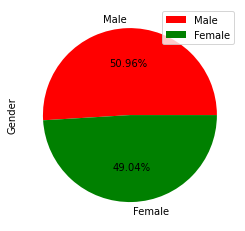

In [20]:
male_py_sc = clean_df['Sex'].value_counts()['Male']
female_py_sc = clean_df['Sex'].value_counts()['Female']

gender_formula = [male_py_sc / total_mouse *100, female_py_sc / total_mouse *100]



gender_pie_df = pd.DataFrame({'Gender': gender_formula}, 
                            index=['Male', 'Female'])



colors = ['Red', 'Green']
gender_pie = gender_pie_df.plot(kind='pie', y="Gender",autopct='%1.2f%%', colors=colors) 

gender_pie

([<matplotlib.patches.Wedge at 0x11d845e50>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '50.96%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.04%')])

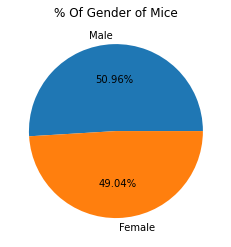

In [21]:
#create plt.pie chart
mpl_pie_df = clean_df['Sex'].value_counts()
mpl_pie_chart = plt.pie(mpl_pie_df, labels=['Male', 'Female'], autopct='%1.2f%%')

plt.title("% Of Gender of Mice")
mpl_pie_chart


# BOXPLOT

In [22]:
#calculate final tumor volume for each mouse across 4 of treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin

max_time_df = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
max_time_df = max_time_df.reset_index()
max_time_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [23]:
final_tumor_df = pd.merge(max_time_df, clean_df, on=['Mouse ID', 'Timepoint'], how='inner')

final_tumor_df
                        

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [24]:
final_tumor_df.head(50)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [25]:
#create list for treatments
treat_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [26]:
#Create empty list for tumor volume data
tumor_vol = []

In [27]:
#Create for loop to add tumor vol for each treatment 
#Determine any potential outliers with upper bound and lower bound

for drugs in treat_names:
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drugs, 'Tumor Volume (mm3)']
    tumor_vol.append(final_tumor_vol)
    
    
    


In [28]:
#print(tumor_vol)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


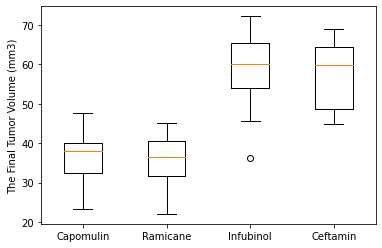

In [29]:
def deter_outliers(medicine):
    meds_df = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == medicine]['Tumor Volume (mm3)']
    quartiles = meds_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = meds_df.loc[(meds_df < lower_bound) | (meds_df > upper_bound)]
    print(outliers)
    return meds_df


med_1 = deter_outliers('Capomulin')
med_2 = deter_outliers('Ramicane')
med_3 = deter_outliers('Infubinol')
med_4 = deter_outliers('Ceftamin')

plt.boxplot([med_1, med_2, med_3, med_4], labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.ylabel("The Final Tumor Volume (mm3)")

plt.tight_layout
plt.show()


# LINE  PLOT

In [30]:
capo_list = clean_df.groupby(['Drug Regimen','Mouse ID','Timepoint', 'Tumor Volume (mm3)']).size()
capo_df = pd.DataFrame(capo_list)
capo_df.head(50)

0
Drug Regimen Mouse ID Timepoint Tumor Volume (mm3)   
Capomulin    b128     0         45.000000           1
                      5         45.651331           1
                      10        43.270852           1
                      15        43.784893           1
                      20        42.731552           1
                      25        43.262145           1
                      30        40.605335           1
                      35        37.967644           1
                      40        38.379726           1
                      45        38.982878           1
             b742     0         45.000000           1
                      5         41.534097           1
                      10        41.999228           1
                      15        39.524843           1
                      20        37.950355           1
                      25        38.617684           1
                      30        39.167949           1
                      35        39.847576           1
                      40        38.255627           1
                      45        38.939633           1
             f966     0         45.000000           1
                      5         38.796474           1
                      10        35.624403           1
                      15        32.623003           1
                      20        30.485985           1
             g288     0         45.000000           1
                      5         45.839400           1
                      10        46.304003           1
                      15        42.172301           1
                      20        42.957120           1
                      25        42.368692           1
                      30        42.874461           1
                      35        38.954115           1
                      40        36.356851           1
                      45        37.074024           1
             g316     0         45.000000           1
                      5         44.022752           1
                      10        44.502042           1
                      15        45.216743           1
                      20        45.933322           1
                      25        46.809225           1
                      30        44.221480           1
                      35        44.702833           1
                      40        45.565821           1
                      45        40.159220           1
             i557     0         45.000000           1
                      5         42.261665           1
                      10        42.992077           1
                      15        43.529876           1
                      20        43.967895           1

In [31]:
#reference df
mouse_id_line = comb_data_df.loc[comb_data_df['Mouse ID'] == 'g316']


mouse_id_line




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0
354,g316,Capomulin,Female,22,22,15,45.216743,0
355,g316,Capomulin,Female,22,22,20,45.933322,1
356,g316,Capomulin,Female,22,22,25,46.809225,1
357,g316,Capomulin,Female,22,22,30,44.221480,2
358,g316,Capomulin,Female,22,22,35,44.702833,2
359,g316,Capomulin,Female,22,22,40,45.565821,2
360,g316,Capomulin,Female,22,22,45,40.159220,2


Text(0.5, 1.0, 'Mouse ID vs Drug Regimen')

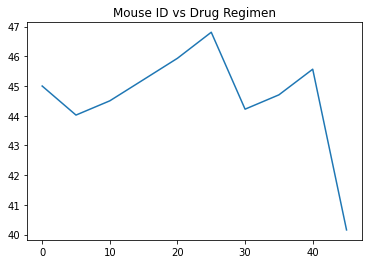

In [32]:
plt.plot(mouse_id_line['Timepoint'],mouse_id_line['Tumor Volume (mm3)'])
plt.title('Mouse ID vs Drug Regimen')


# SCATTER PLOT

In [33]:
#Create scatter plot for tumor volume using capomulin regimen
capo_list_2 = clean_df.groupby(['Drug Regimen', 'Weight (g)','Tumor Volume (mm3)']).size()
capo_df_2 = pd.DataFrame(capo_list_2)
capo_df_2

capo_scat_df = comb_data_df.loc[comb_data_df['Drug Regimen']=='Capomulin']
capo_scat_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [34]:
capo_scatter = capo_scat_df.groupby([capo_scat_df['Weight (g)']])['Tumor Volume (mm3)'].mean()
capo_scatter = capo_scatter.reset_index()
capo_scatter

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


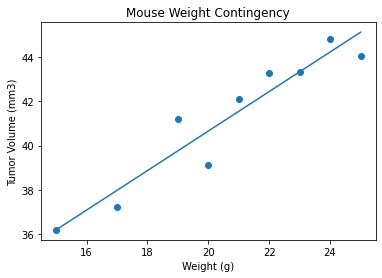

In [41]:
plt.scatter(capo_scatter['Weight (g)'], capo_scatter['Tumor Volume (mm3)'])
plt.title('Mouse Weight Contingency')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.plot(x_var, slope_formula)

plt.show()

In [36]:
line_regress = st.linregress(capo_scatter['Weight (g)'], capo_scatter['Tumor Volume (mm3)'])


 
line_regress



LinregressResult(slope=0.894772609734063, intercept=22.764229983591896, rvalue=0.9505243961855268, pvalue=8.449451040646352e-05, stderr=0.11052782862741348, intercept_stderr=2.3096525842955296)

In [37]:
#y=mx+b

line_regress.slope

0.894772609734063

In [38]:
x_var = capo_scatter['Weight (g)']
x_var

0    15
1    17
2    19
3    20
4    21
5    22
6    23
7    24
8    25
Name: Weight (g), dtype: int64

In [39]:
slope_formula = x_var * line_regress.slope + line_regress.intercept


In [40]:
coeff = line_regress.rvalue
coeff

0.9505243961855268